In [1383]:
#GAMZE MADEN
#504202514
#########################
import numpy as np
#import any other  modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################

import matplotlib.pyplot as plt
# Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks
from networkx import nx, gnm_random_graph, gnp_random_graph, erdos_renyi_graph 
import networkx.algorithms.community as nx_comm
from networkx.algorithms.smallworld import random_reference
import random
import community 
from numpy import linalg as LA
from tqdm import tqdm
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

/home/gamze/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# QUESTION 1 
A random graph is selected from the collection of all graphs in the G(n,M) model. n nodes and M edges. Nodes are considered affected, that is, by allowing vertices, different graphs are obtained. For example, the G(3,2) model has three two sided graphs on the three labeled vertices, and each of these three graphs is included with probability. 1/3

In the G(n,p) model, a graph is crated by randomly joining the labeled nodes. Each edge is included in the graph with probability, independently of the other edges. Equivalently, the probability of constructing every graph that has nodes and M edges

The parameter p can be thought of as a weighting function in this model; From 0 to 1 increasing from p, the model becomes more and more likely to include graphs with more edges, and less and less likely to include graphs with fewer edges. 

# QUESTION 2 

In a 1960 paper, Erdos and Renyi clearly defined the case of G(n,p) for various P-values. 
Results;
-	If np<1, then it is almost certain that there will be no connected components in G(n,p) larger than O(log(n)) in size.
-	If np=1, then a graph located in G(n,p) will have the largest component, the approximate exact size of which is of the order of .
-	 If np→c >1, then c is constant in this case, then a graph G(n,p) will have a unique giant component containing approximately a positive fraction of the vertices.
-	 If P< , then a graph in G(n,p) will contain almost isolated vertices and will thus be disconnected.
-	 If P> , then a graph of G(n,p) will be almost connected. Thus, n is a definite threshold for its connection.

    • Other properties of the graph can be defined precisely because n tends to infinity. For example, a k(n) is approximately equal to , where G(n, 0.5) is the largest group and has a size of almost K(n) or K(n)+1.


# QUESTION 3 
There are two main components explaining the emergence of scaleless feature in complex networks. These are; growth and preferential attachment. By growth is meant a growth process in which new nodes participate in an already existing system for a long time. Secondly and finally, with the preferential attachment, the meaning october be deduced that the new nodes prefer to connect to nodes that already have a high number of connections with others. Because of this, the likelihood that more nodes will connect themselves to someone who already has a large number of connections increases, and this node will turn into a thin Hub. Depending on the network, the hubs can be various or unrelated. Diversity is found in social networks, where they are well connected, will tend to get to know each other better.

# QUESTION 4
The most remarkable feature in a measure network is the commonality of seeing vertices with a degree that exceeds the average by a large measure. The buttons of the highest degree are called "hubs" in general and serve specific purposes in their network, but they are largely connected to the domain.
*Percolation
The scaleless property has a strong relationship with the robustness of the network. It turns out that the main centers are closely followed by smaller ones. These small hubs are followed by other nodes with an even smaller rating.
*Clustering
Another important feature of scaleless networks is the clustering coefficient distribution, which decreases as the degree of nodes increases. This distribution also corresponds to a power law. This means that low-order nodes belong to very dense subgraphs, and these subgraphs are interconnected through hubs. Imagine a social network in which nodes are familiar relationships between people, and connections are familiar relationships between people, it seems that people tend to create communities, that is, small groups in which everyone knows everyone dec
*Distance In Scale Free Networks
Another feature concerns the average dec between two vertices in a network. In particular, an uncorrected power law graph with 2<y<3 will have ultrasmall-wide d- In In N, where N is the number of nodes in the network, as evidenced by cohen and havlin. Therefore, the diameter of a growing scaleless mesh is considered practically almost constant.
*Immunization
The question of how it would be appropriate to efficiently scale free networks representing the Internet and other social networks is being thoroughly studied. One of these strategies is to overcome the nodes of the greatest degree, that is, targeted attacks.

## Part A: Simulate exponential and free-scale networks

In [1384]:
#Implement Part A

In [1385]:
#Erdos-Renyi codes are from example file with required changes implemented
V = 200 # node count from hw
min_p = 0.08 # Specific minimum p value for Erdos-Renyi model
max_p = 0.85 # Specific maximum p value for Erdos-Renyi model

# Erdos-Renyi is a generative model. 
graph_count = 30 # to be used for erdös and scale-free graphs, seperately
node_draw_size = 75 # Node circle size in plots

seed = 1773 

## DO NOT CHANGE
np.random.seed(seed)
graph_creation_seed = np.random.randint(seed, size = graph_count*150000) ## for graph_count*150000 creations just in case of creating not connected graphs
graph_creation_seed = [int(i) for i in graph_creation_seed]
max_solver_iterations = 1000000000

In [1386]:
## Setting different Erdös-Renyi probabilities to prevent very similar node-degreed graphs
probs = np.linspace(min_p, max_p, num=graph_count)

# Creating a graph array to easily iterate over them
erdos_array = []

seed_i = 0
i = 0

print("Creating Erdös-Renyi graphs..")

#30 graphs are goint to be stored in arrays
while i < graph_count:
    #we start building graphs by library
    temp_graph = erdos_renyi_graph(V, probs[i], seed = graph_creation_seed[seed_i], directed = False)
    
    #add new generated graph to array if its fully connected
    if nx.is_connected(temp_graph): 
        erdos_array.append(temp_graph.copy())
    else:
        i -= 1 ## try creating again
        
    seed_i += 1 ## changing the seed to create different graph
    i += 1

# #adding positive weights
for G in erdos_array:
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1, 10)

Creating Erdös-Renyi graphs..


In [1387]:
"""""this is a function for undirected SF (geeksforgeeks)"""""
def barabasi_albert_graph(n, m, seed=None):
    """Returns a random graph according to the Barabási–Albert preferential
    Attachment model.
  
  
    Parameters
    ----------
    n : Number of nodes
    m : Number of edges 
    
    NetworkXError
        If ``m`` does not satisfy ``1 <= m < n``. """  
    #first we check if node count is bigger than edge count
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)
  
    # Add m initial nodes this is like creating a skeleton
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m)) #how many nodes to add
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    #here we add edges
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G #returns graph

In [1388]:
# Creating Scale-free graphs
print("Creating Scale-free graphs..")
time.sleep(1)

i = 0
scale_free_array = []
#filling the array until counts to 30
while i < graph_count:
    #200 nodes as hw requires
    temp_graph= nx.barabasi_albert_graph(200,10,seed_i)
    scale_free_array.append(temp_graph.copy())        
    seed_i += 1 ## changing the seed to create different graph
    i += 1
#adding positive weights
for G in scale_free_array:
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1, 10)

Creating Scale-free graphs..


# QUESTION 5 Visualize two random graphs you simulated (ER and SF)

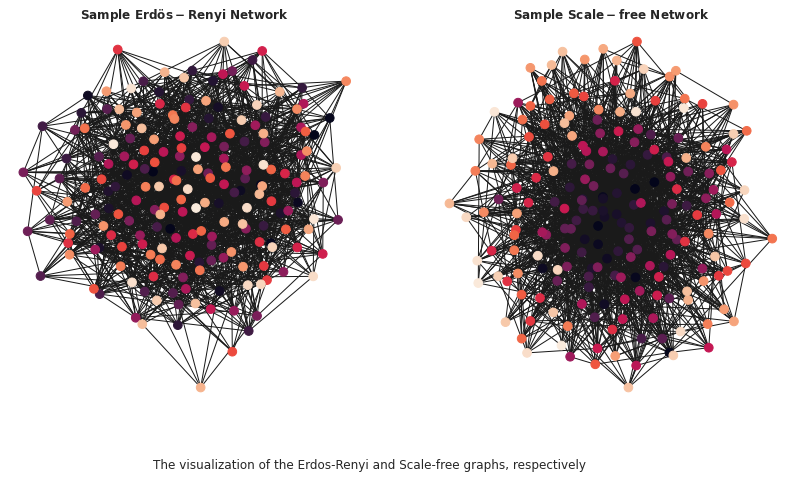

In [1389]:
sampled_networks = [erdos_array[0], scale_free_array[0]] # Selecting the first pair of Erdos and Scale-free versions

# Creating the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
ax = axes.flatten()
ax[1].title.set_text(r"$\mathbf{Sample\ Scale-free\ Network}$")
ax[0].title.set_text(r"$\mathbf{Sample\ Erdös-Renyi\ Network}$")

# Iterating in the pair
for i in range(2):
    nx.draw(sampled_networks[i], ax=ax[i], node_color=range(V), node_size=75) # Drawing the graph, assign randomized colors
    ax[i].set_axis_off()
    
# Plotting with the caption
fig.text(.27,0,"The visualization of the Erdos-Renyi and Scale-free graphs, respectively")
plt.show()

In [1390]:
## Defining a centrality list to use later
centralities = []

In [1391]:
#function to calculate degree centrality
def degree_centrality(G):
    return dict(G.degree(weight = "weight"))

centralities.append(degree_centrality)

In [1392]:
#function to calculate eigenvector centrality
def eigenvector_centrality(G):
    return nx.eigenvector_centrality(G, weight = "weight", max_iter = max_solver_iterations)

centralities.append(eigenvector_centrality)

In [1393]:
#creating empty array for 30 graphs to store centrality measures
erdos_centralities = np.zeros((graph_count, len(centralities), V))

#Erdos-Renyi both centralities are calculated and stored in array
for erdos_id, erdos in enumerate(tqdm(erdos_array)):
    for centrality_id, centrality in enumerate(centralities):
        erdos_centralities[erdos_id, centrality_id] = np.nan_to_num(np.array(list(centrality(erdos).values())), 0)

100%|██████████| 30/30 [00:02<00:00, 11.08it/s]


In [1394]:
#creating empty array for 30 graphs to store centrality measures
scalefree_centralities = np.zeros((graph_count, len(centralities), V))

#Scale-free both centralities are calculated and stored in array
for scalefree_id, scalefree in enumerate(tqdm(scale_free_array)):
    for centrality_id, centrality in enumerate(centralities):
        scalefree_centralities[scalefree_id, centrality_id] = np.nan_to_num(np.array(list(centrality(scalefree).values())), 0)

100%|██████████| 30/30 [00:01<00:00, 26.78it/s]


In [1395]:
#degree centralities are calculated for ER and SF graphs and summed as requested in Question 6
total_erdos_degree = [] 
for centrality_results in tqdm(erdos_centralities):  #tqdm for simulation
    total_erdos_degree.append(centrality_results[0,:].sum())

total_scalefree_degree = [] 
for centrality_results in tqdm(scalefree_centralities): 
    total_scalefree_degree.append(centrality_results[0,:].sum())
    


100%|██████████| 30/30 [00:00<00:00, 72274.05it/s]


In [1396]:
#eigenvector centralities are calculated for ER and SF graphs and summed as requested in Question 6

total_erdos_eigen = [] 
for centrality_results in tqdm(erdos_centralities): #tqdm for simulation
    total_erdos_eigen.append(centrality_results[1,:].sum())
    
total_scalefree_eigen = [] 
for centrality_results in tqdm(scalefree_centralities): 
    total_scalefree_eigen.append(centrality_results[1,:].sum())

100%|██████████| 30/30 [00:00<00:00, 64133.09it/s]


# QUESTION 6 Plot the overlaid distributions of the node strength centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.

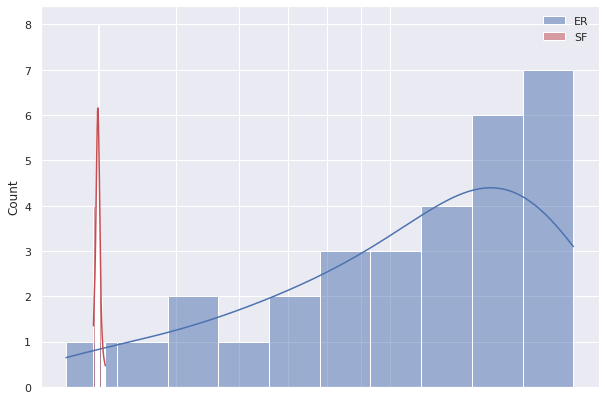

In [1397]:
#here I plot the total degree centralities in log scale overlaid for both ER and SF
arr_scale_degree=np.array(total_scalefree_degree)
arr_erdos_degree=np.array(total_erdos_degree)
#I used sns library for better visualization
sns.set(style="darkgrid")
fig, axs = plt.subplots(figsize=(10,7))
#I chose to set bin count 10 and kernel density estimation to show trend
sns.histplot(data=arr_erdos_degree, alpha=0.5, color='b',label="ER",kde=True,ax=axs,bins=10, log_scale=True)
sns.histplot(data=arr_scale_degree, alpha=0.5, color='r', label="SF",kde=True,ax=axs,bins=10, log_scale=True)
plt.legend(loc='best')
axs.set_xticks([30000,40000,50000,60000,70000, 80000])
plt.show()

# QUESTION 6 cont. 
ER degree centrality shows an exponential distribution, as expected. SF degree centraliy shows uniform distribution. Its values are around 20k but in ER its left skewed and values are more spread between 30k-80k

# QUESTION 7 Plot the overlaid distributions of the eigenvector centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.

/home/gamze/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


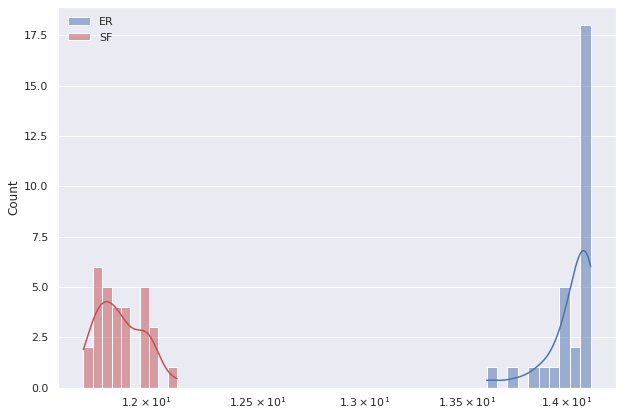

In [1398]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data=total_erdos_eigen, alpha=0.5, color='b',label="ER",kde=True,ax=axs,bins=10, log_scale=True)
sns.histplot(data=total_scalefree_eigen, alpha=0.5, color='r', label="SF",kde=True,ax=axs,bins=10, log_scale=True)
plt.legend(loc='best')
plt.show()

# QUESTION 7 cont.
Eİgen value distribution shows similar behavior. Again ER eigen values have exponential distribution while SF show Gaussian. Similarly ER values are left skewed.

## Part B: Analyzing Erdos-Renyi and Scale-Free graphs in both random error and target attack scenarios

In [1399]:
#Implement PART B:


/home/gamze/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# QUESTION 1 Code up a function called ‘findPercolationThreshold’, where you input a positive weighted adjacency matrix and it automatically outputs its percolation threshold fc. 

In [1400]:
#takes input adjacency matrix
def findPercolationThreshold(adjMatrix):
    """Return the threshold value for adjacency matrix"""
    first_node = 0 #marks first node 
    last_node = len(adjMatrix) - 1 #marks last node len-1 since index starts from 0
    #ravel flattens the array, meaning it return 1-D array. For this example I used 4x4 matrix and ravel returns 1x16
    #np.unique finds non-repeating elements in matrix and sorts and assigns array of unique elements to variable 'probabilities' 
    probabilities = np.unique(adjMatrix.ravel()) 
    low = 0 #lowest value
    high = len(probabilities) #highest value as count of unique elements
    
#if difference between lowest and highest numbers bigger than 1, loops
    while high - low > 1:
        # i is median values index
        i = (high + low) // 2
        #find new median value at each time it loops and assign it to 'prob'
        prob = probabilities[i]
        #take a copy of input adjacency matrix
        copied_array = np.array(adjMatrix)
        #give 0.0 to items smaller than calculated median value at each time. We need to keep values bigger than median
        copied_array[copied_array < prob] = 0.0
        #Call NX library and build graph from adjacency matrix 
        graph = nx.from_numpy_matrix(copied_array)
        #if there exists a path (edge) between first and last node then set low=i otherwise high=i
        #This means our median value is going to increase next loop because in if condition new lowest value becomes previous median value         
        if nx.has_path(graph, first_node, last_node):
            low = i
        else: # if there is no path then median value will decrease
            high = i
    
    return probabilities[low] #returns elements of latest median value index as threshold

# QUESTION 2 Comment out each line of your ‘findPercolationThreshold’ function and add a text box explaining how your algorithm works.
findPercolationThreshold function takes an input adjacency matrix and returns threshold element as index of latest estimated median value. It iterates over array of unique sorted elements until lowest and highest indexes meets in middle. At each time algorithm zeros out elements smaller than calculated median value. Then it builds graph to see paths between nodes, if there is a path, median value increases since new lowest value increases (low=i). Otherwise median value decreases since new highest value becomes previous (smaller since its sorted) median value. At the end of iteration returned value is index of median pointing threshold element in unique array.

In [1401]:
adjMx=np.array([[0,      0.3,    0.4,    0.1],
                        [0.3,    0,      0.9,    0.2],
                        [0.4,    0.9,    0,      0.7],
                        [0.1,    0.2,    0.7,   0]])

In [1402]:
print('Threshold is {}'.format(findPercolationThreshold(adjMx)))

Threshold is 0.4


In [1403]:
adjMx_2=np.array([[0,    0,    0,    0, 0, 1,0,0],#0
                  [0,    0,    0,    0, 1, 0,0,1],#1
                  [0,    0,    1,    1, 1, 0,0,1],#2
                  [0,    1,    0,    1, 0, 0,0,0],#3
                  [0,    0,    1,    0, 1, 0,0,1],#4 
                  [1,    0,    0,    0, 0, 1,1,0],#5
                  [0,    0,    0,    0, 0, 1,0,0],#6
                  [0,    0,    0,    0, 0, 0,0,0]])#7

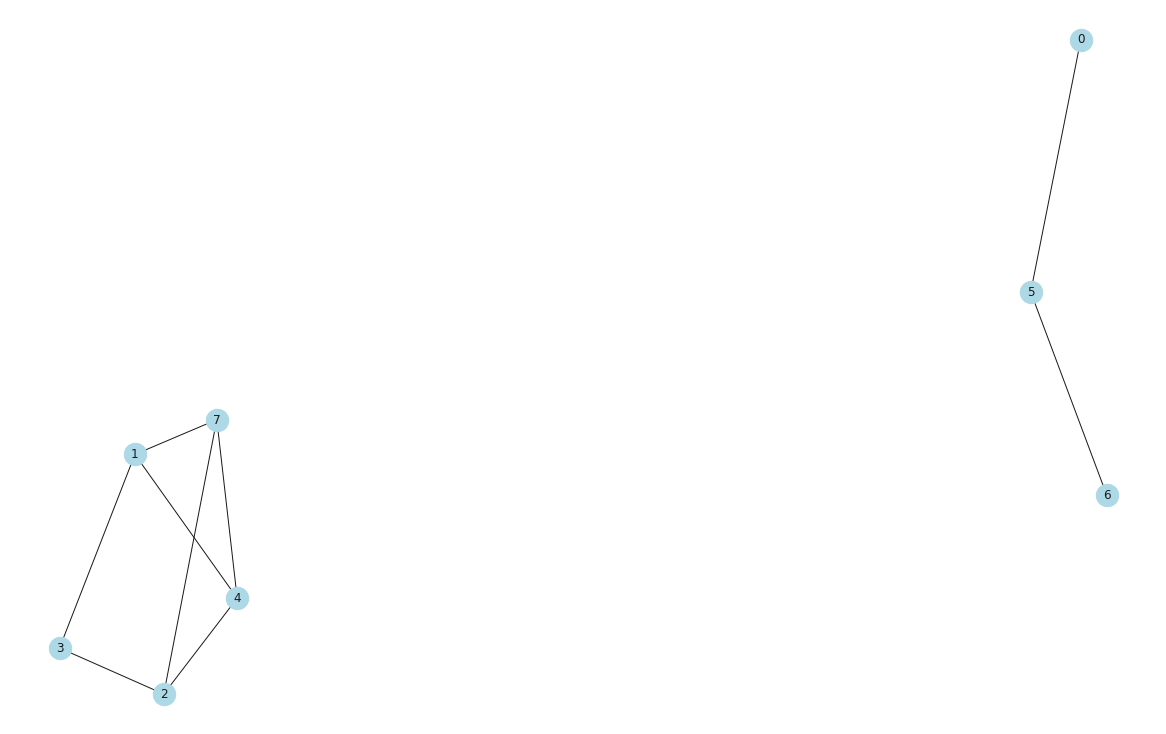

In [1404]:
G = nx.from_numpy_matrix(adjMx_2)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)

# QUESTION 3 Code up a function called ‘largestConnectedComponent’, where you input a positive weighted adjacency matrix and it automatically outputs (1) the largest connected component graph, (2) its node size S and (3) its diameter d defined as the average of the shortest paths between all pairs of nodes in the large connected component graph.

In [1405]:
#takes input adjacency matrix
def largestConnectedComponent(adjMatrix):
    #store a array copy of input matrix
    copied_array = adjMatrix
    #build graph from NX library
    graph = nx.from_numpy_matrix(copied_array)
    #assign max of connected components
    largest = max(nx.connected_components(graph), key=len)
    #create graph of largest connected component
    G_sub = graph.subgraph(largest)
    #print length of LCC
    print("S: ",len(largest))
    #print diameter d of LCC 
    print("d: ",nx.average_shortest_path_length(G_sub))
    return len(largest),nx.average_shortest_path_length(G_sub),G_sub #return length, diameter and graph of LCC

# QUESTION 4 Comment out each line of your ‘largestConnectedComponent’ function and add a text box explaining how your algorithm works.
function takes input adjacency matrix and returns LCC length, diameter and graph. NX library takes input graph and returns all connected components. Since HW asks for largest one it takes max. Later to calculate average of all shortest paths of LCC it again creates LCC sub graph. 

S:  5
d:  1.3


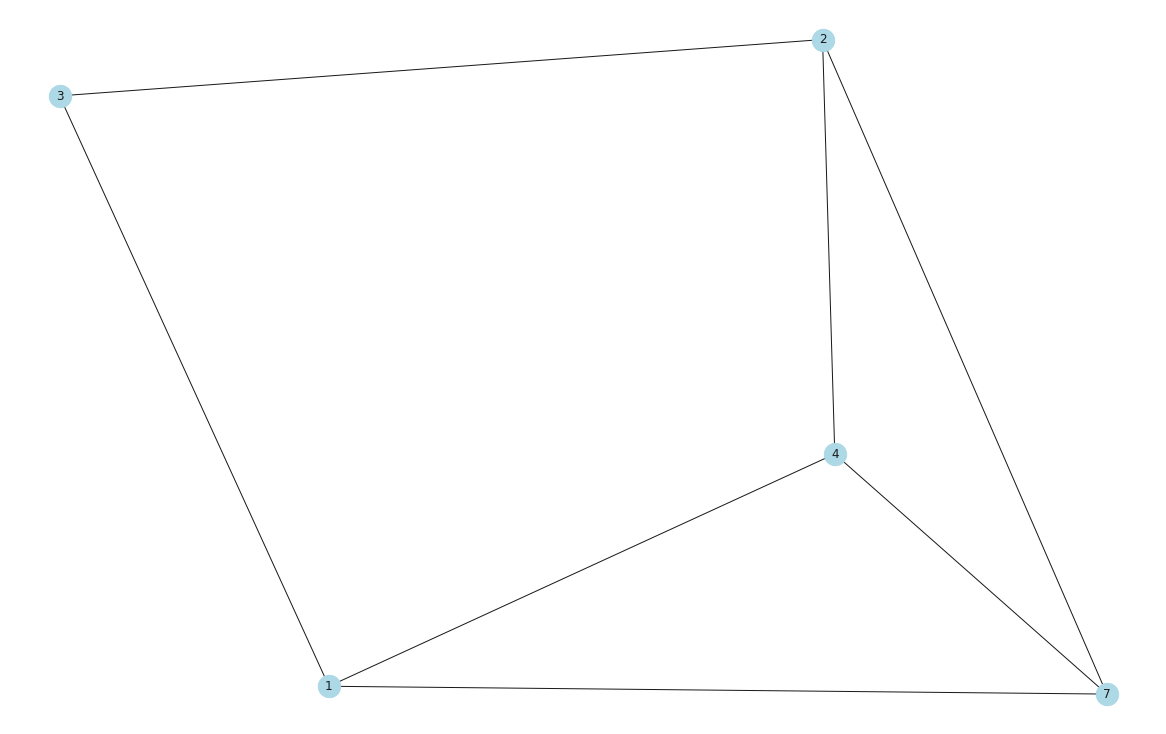

In [1406]:
l,p,G_sub=largestConnectedComponent(adjMx_2)
nx.draw(G_sub, with_labels=True, node_color='lightblue', node_size=500)

# QUESTION 5 Random failure scenario. Code up a function called ‘randomError’, inputting (1) the graph adjacency matrix and (2) the fraction (between 0 and 1) of nodes to be randomly removed and returns the adjancy matrix graph excluding the removed nodes. Comment out the code and explain in a text box how it works.

In [1407]:
#function takes input adjacency matrix and fraction of nodes to remove
def randomError(adjMatrix,fraction):
    #in case input f has more than one decimals then round 
    f=round(fraction,1)
    #cast matrix to pandas DataFrame object
    df = pd.DataFrame(adjMatrix)
    #create empty DataFrame to store remaining nodes
    remaining_adj=pd.DataFrame()
    #pandas library has a method called 'sample' which samples out the sub frame by given fraction. That's why I sent (1-f). 
    #It selectes sampled rows randomly and with the same 'seed' it selects the same random columns to sample.
    #Both columns and rows of sent fraction is going to be removed to create square matrix so we sample twice for rows and columns
    remaining_adj=df.sample(frac=1-f, replace=False, random_state=500).sample(frac=1-f, replace=False, random_state=500,axis=1)
    #create graph from adjacency matrix
    G_after_error = nx.from_pandas_adjacency(remaining_adj, create_using=nx.Graph)
    #return adjacency matrix graph 
    return G_after_error

# QUESTION 5 cont.
Function takes input adjacency matrix and fraction of nodes to remove. Sample method extracts rows and columns of given 1-fraction. Because this method doesn't work by removing the nodes rather extract them as sub array.

In [1408]:
adjMx_3=np.array([[0,      0.3,    0.4,    0.7,      0.7,    0.2,    0.1,    0.9,    0,      0.1],
                  [0.3,    0,      0.9,    0.2,      0.3,    0.4,    0.7,    0.3,    0.4,    0.7],
                  [0.3,    0,      0.9,    0.2,      0.3,    0.4,    0.7,    0.3,    0.4,    0.7],         
                  [0.4,    0.9,    0,      0.1,      0,      0.9,    0.2,    0,      0.9,    0.2],          
                  [0.3,    0,      0.9,    0.2,      0.3,    0.4,    0.7,    0,      0.9,    0.2],
                  [0,      0.3,    0.4,    0.7,      0.9,    0,      0.1,    0.4,    0.9,    0],
                  [0.3,    0,      0.9,    0.2,      0.3,    0.4,    0.7,    0.9,    0,      0.1],
                  [0.4,    0.9,    0,      0.1,      0,      0.9,    0.2,    0.9,    0,      0.1],
                  [0.4,    0.9,    0,      0.1,      0,      0.9,    0.2,    0,      0.9,    0.2],
                  [0.7,    0.2,    0.1,    0,        0.9,    0,      0.1,    0.3,    0,      0.9]])

Calculating remaining G...


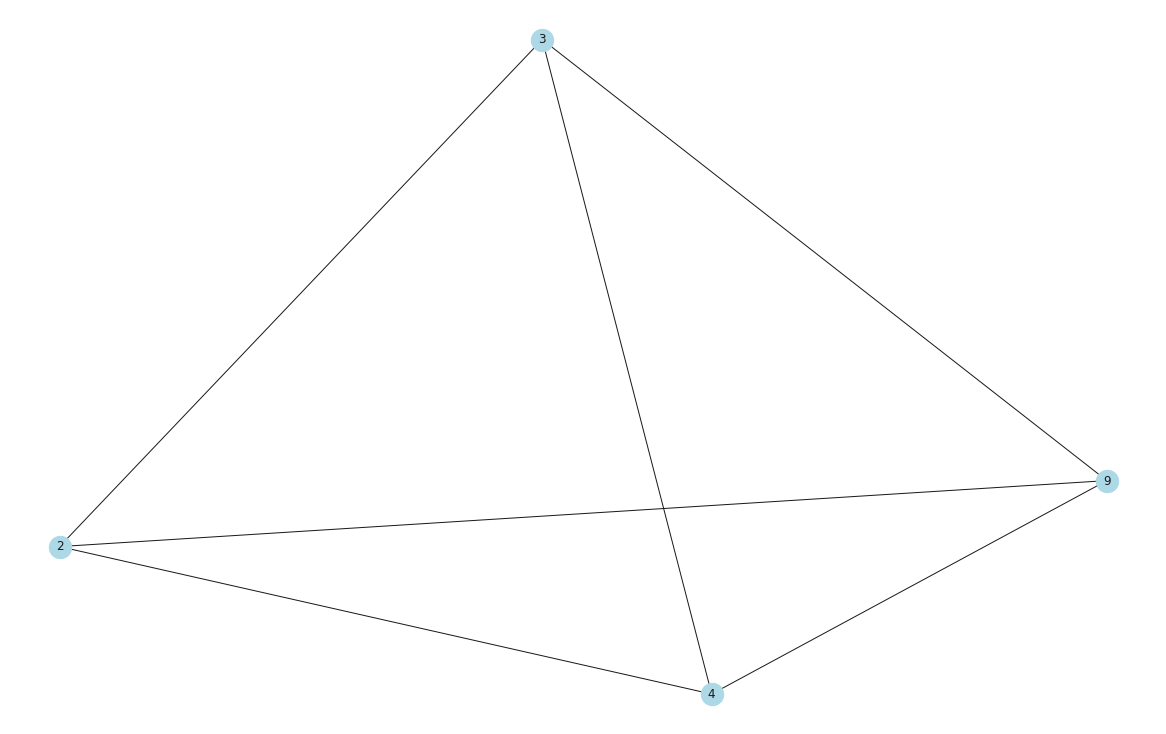

In [1409]:
print("Calculating remaining G...")
G_after_error=randomError(adjMx_3,0.6)
nx.draw(G_after_error,with_labels=True, node_color='lightblue', node_size=500)
time.sleep(3)

# QUESTION 6 Target attack scenario. Code up a function called ‘targetAttack’, inputting (1) the graph adjacency matrix and (2) the fraction (between 0 and 1) of nodes to be attacked removed and returns the adjancy matrix graph excluding the removed nodes. Note that the nodes to be removed are those with the highest strength. Comment out the code and explain in a text box how it works.

In [1410]:
#function takes input adjacency matrix and fraction of nodes to remove
def targetAttack(adjMatrix,fraction):
    #store number of rows and columns of input matrix 
    num_rows, num_cols = adjMatrix.shape
    #store copy of matrix
    copied_array=adjMatrix
    #in case input f has more than one decimals round 
    f=round(fraction,1)
    #fraction of nodes to target to remove is assigned to a new variable
    targetted_num_nodes=round(num_rows*f)
    #use copied array to create graph object
    G = nx.from_numpy_matrix(copied_array)
    #store degree centrality values in a dictionary {node: strength} 
    dict_strength=degree_centrality(G)
    #sort node strengths from highest to lowest by setting reverse=True.  
    dict_sorted_strength = {k: v for k, v in sorted(dict_strength.items(),reverse=True ,key=lambda item: item[1])}
    #Targetted node-strength pairs stored in targetted_nodes list
    targetted_nodes= list(dict_sorted_strength.items())[:targetted_num_nodes]
    #cast list to pandas DataFrame object to better work with to extract node numbers.
    targetted_nodes_indexes = pd.DataFrame(targetted_nodes)
    #takes 0 index values of DataFrame object since its header is like [node_index; strength_value]
    targetted_nodes_indexes_=targetted_nodes_indexes[0]
    #remove targetted nodes of numpy array stored in the beginning and second input tells which nodes to remove, third input tells which axis
    remained_adj=np.delete(copied_array,targetted_nodes_indexes_,0)
    #repeat above process for columns as well to create a square matrix
    remained_adj_=np.delete(remained_adj,targetted_nodes_indexes_,1)
    #create graph from adjacency matrix
    G_after_attack = nx.from_numpy_matrix(remained_adj_, create_using=nx.Graph)
    #return adjacency matrix graph 
    return G_after_attack

# QUESTION 6 cont.
Function takes input adjacency matrix and fraction of nodes to remove. Delete method removes rows and columns of given fraction f. First we create a graph of input matrix and find its degree centralities of each node. After that, it sorts the nodes according to their strength from highest to lowest because HW requires us to target the strongest nodes. Working with sorted array makes it much easier. Then it returns resulted graph object

Calculating remaining G...


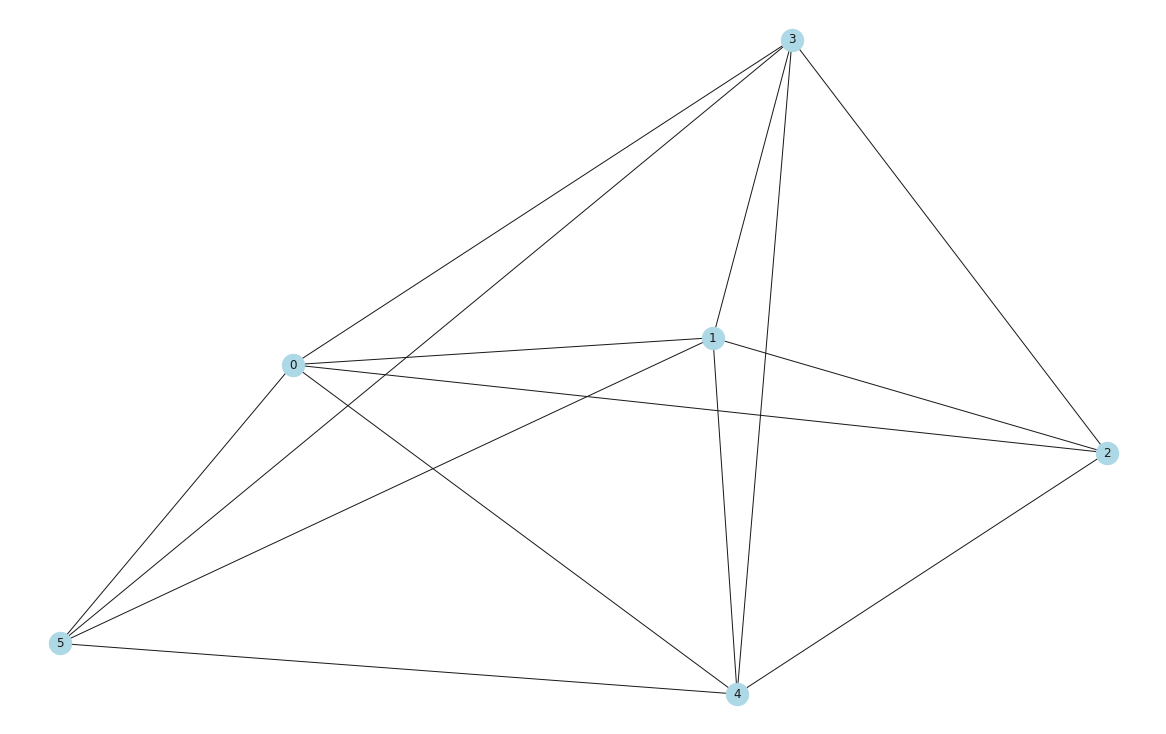

In [1411]:
print("Calculating remaining G...")
G_after_attack=targetAttack(adjMx_3,0.4)
nx.draw(G_after_attack,with_labels=True, node_color='lightblue', node_size=500)
time.sleep(3)

# QUESTION 7 Given one random ER network and one random SF network (you select two from your 60 simulated graphs), plot the diameter d of the largest connected component as in Fig. 2 against the fraction of removed nodes in both random error and target attack scenarios. The nodes need to be removed progressively (e.g., remove 0.1, 0.2, until reaching 0.8). 

In [1412]:
#these variables are going to be used for last question calculation of threshold of all graphs
t_ER=[]
t_SF=[]

In [1413]:
#Create adjacency matrixes randomly from graphs for ER and display its S and d 
ER_adj=nx.to_numpy_array(erdos_array[np.random.randint(1,30)])
copy_ER=np.array(ER_adj)
#add this graph to main storage array to use last question below
t_ER.append(findPercolationThreshold(copy_ER))
#initialize ER for t and S for randomError function return
ER_diameter_random=[]
ER_S_random=[]

#for all fraction values
for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
    print(f)
    #take a copy of random graph
    copy_ER_error=np.array(copy_ER)
    #call randomError function with inputs
    new_adj=randomError(copy_ER_error,f)
    #wait until it creates without interruption
    time.sleep(3)
    #cast returned graph(hw requires) to matrix
    new_adj_=nx.to_numpy_array(new_adj)
    #call LCC function and store returned values S, d and graph of LCC
    S,d,G_sub=largestConnectedComponent(new_adj_)
    time.sleep(3)
    #add d to its storage array for ER
    ER_diameter_random.append(d)
    #add S to its storage array for ER
    ER_S_random.append(S)
    
time.sleep(3)

#initialize d and S values for targetAttack function return
ER_diameter_target=[]
ER_S_target=[]

for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
    print(f)
    #take a copy of random graph
    copy_ER_target=np.array(copy_ER)
    #call targetAttack function with inputs
    new_adj=targetAttack(copy_ER_target,f)
    time.sleep(3)
    #cast returned graph(hw requires) to matrix
    new_adj_=nx.to_numpy_array(new_adj)
    #call LCC function and store returned values S, d and graph of LCC
    S,d,G_sub=largestConnectedComponent(new_adj_)
    time.sleep(3)
    #add d to its storage array for ER
    ER_diameter_target.append(d)
    #add S to its storage array for ER
    ER_S_target.append(S)
    
time.sleep(3)

0.1
S:  180
d:  1.6535692116697702
0.2
S:  160
d:  1.6516509433962263
0.3
S:  140
d:  1.6506680369989724
0.4
S:  120
d:  1.65
0.5
S:  100
d:  1.646060606060606
0.6
S:  80
d:  1.6414556962025317
0.7
S:  60
d:  1.6502824858757061
0.8
S:  40
d:  1.646153846153846
0.1
S:  180
d:  1.663376784605835
0.2
S:  160
d:  1.672877358490566
0.3
S:  140
d:  1.6809866392600206
0.4
S:  120
d:  1.6876750700280112
0.5
S:  100
d:  1.6961616161616162
0.6
S:  80
d:  1.7015822784810126
0.7
S:  60
d:  1.7112994350282487
0.8
S:  40
d:  1.7987179487179488


In [1414]:
#Create adjacency matrixes randomly from graphs for SF and display its S and d 
SF_adj=nx.to_numpy_array(scale_free_array[np.random.randint(1,30)])
copy_SF=np.array(SF_adj)
#add this graph to main storage array to use last question below
t_SF.append(findPercolationThreshold(copy_SF))
#initialize SF for t and S for randomError function return
SF_diameter_random=[]
SF_S_random=[]

#for all fraction values
for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
    print(f)
    #take a copy of random graph
    copy_SF_error=np.array(copy_SF)
    #call randomError function with inputs
    new_adj=randomError(copy_SF_error,f)
    time.sleep(3)
    #cast returned graph(hw requires) to matrix
    new_adj_=nx.to_numpy_array(new_adj)
    #call LCC function and store returned values S, d and graph of LCC
    S,d,G_sub=largestConnectedComponent(new_adj_)
    time.sleep(3)
    #add d to its storage array for SF
    SF_diameter_random.append(d)
    #add s to its storage array for SF
    SF_S_random.append(S)
    
time.sleep(3)

#initialize d and S values for targetAttack function return
SF_diameter_target=[]
SF_S_target=[]

#for all fraction values
for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
    print(f)
    #take a copy of random graph
    copy_SF_target=np.array(copy_SF)
    #call targetAttack function with inputs
    new_adj=targetAttack(copy_SF_target,f)
    time.sleep(3)
    #cast returned graph(hw requires) to matrix
    new_adj_=nx.to_numpy_array(new_adj)
    #call LCC function and store returned values S, d and graph of LCC
    S,d,G_sub=largestConnectedComponent(new_adj_)
    time.sleep(3)
    #add d to its storage array for SF
    SF_diameter_target.append(d)
    #add S to its storage array for SF
    SF_S_target.append(S)
    
time.sleep(3)

0.1
S:  180
d:  2.0772811918063314
0.2
S:  160
d:  2.1140723270440254
0.3
S:  140
d:  2.151284686536485
0.4
S:  120
d:  2.211624649859944
0.5
S:  100
d:  2.353939393939394
0.6
S:  80
d:  2.3800632911392405
0.7
S:  58
d:  2.5789473684210527
0.8
S:  34
d:  2.6506238859180034
0.1
S:  180
d:  2.3772191185599008
0.2
S:  160
d:  2.6360849056603772
0.3
S:  140
d:  2.94398766700925
0.4
S:  118
d:  3.403737505432421
0.5
S:  96
d:  4.169298245614035
0.6
S:  68
d:  4.790166812993855
0.7
S:  35
d:  6.0
0.8
S:  6
d:  2.1333333333333333


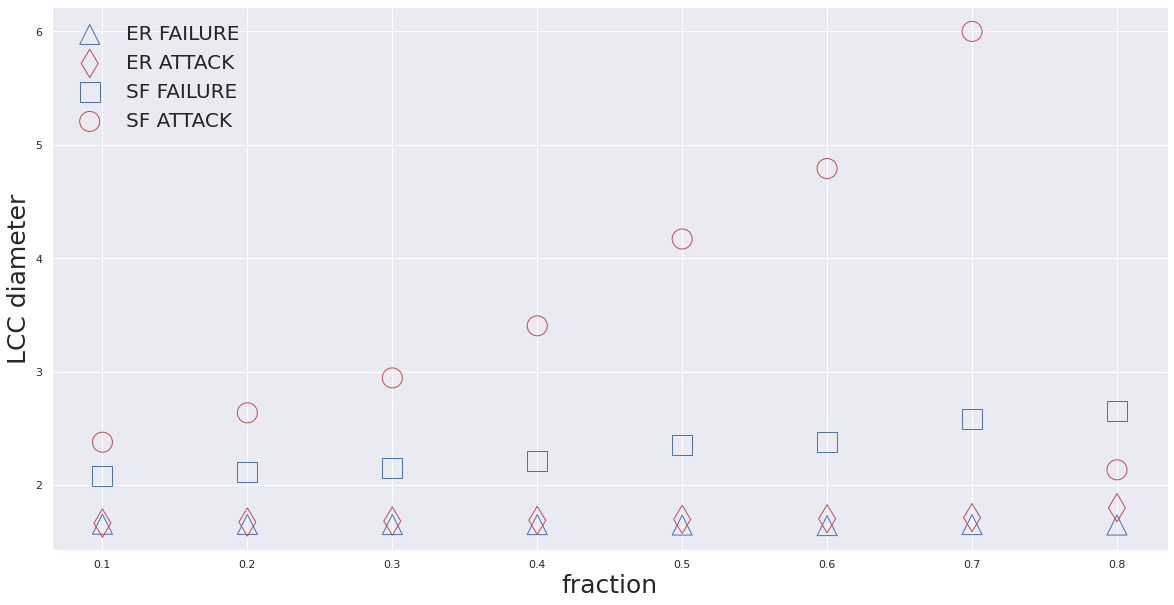

In [1415]:
#DIAMETER d PLOTS
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
y_ER_error = np.asarray(ER_diameter_random)
y_ER_attack=np.asarray(ER_diameter_target)
y_SF_error=np.asarray(SF_diameter_random)
y_SF_attack= np.asarray(SF_diameter_target)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x, y_ER_error,marker='^',color='b',s=400,facecolors='none')
ax.scatter(x,y_ER_attack, marker='d', color='r',s=400,facecolors='none')
ax.scatter(x,y_SF_error, marker='s', color='b',s=400,facecolors='none')
ax.scatter(x,y_SF_attack, marker='o', color='r',s=400,facecolors='none')
ax.legend(labels=['ER FAILURE', 'ER ATTACK', 'SF FAILURE','SF ATTACK'],fontsize=20,loc='upper left')
ax.set_ylabel('LCC diameter',fontsize=25)
ax.set_xlabel('fraction',fontsize=25)
plt.show()

# QUESTION 8 What conclusions can you derive about SF and ER networks and their resilience to random errors and target attacks? Are these conclusions in line with the paper paper[1]?

SF is vulnarable to target attack but sturdy when it comes to random errors. ER is stable against both random error and target attack strategies. This is concordant with the article

# QUESTION 9 Given one random ER network and one random SF network (you select two from your 60 simulated graphs), plot the size S of the LCC of the largest connected component as in Fig. 3 against the fraction of removed nodes in both random error and target attack scenarios. 

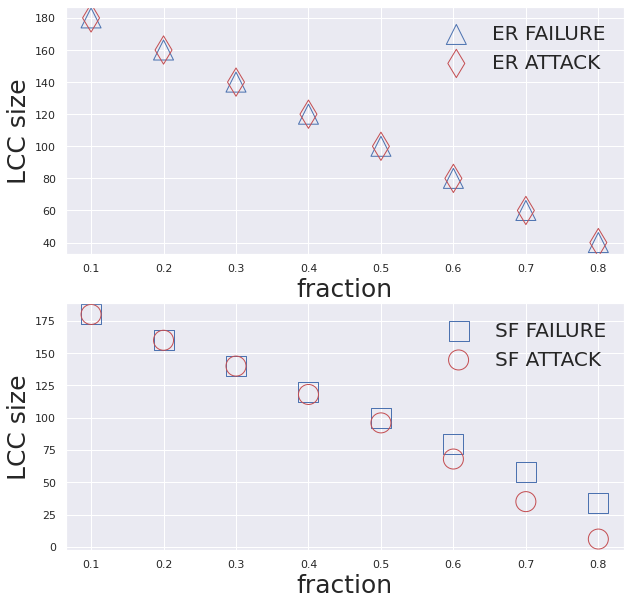

In [1416]:
#SIZE S PLOTS
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
y_ER_error = np.asarray(ER_S_random)
y_ER_attack=np.asarray(ER_S_target)
y_SF_error=np.asarray(SF_S_random)
y_SF_attack= np.asarray(SF_S_target)
fig, ax = plt.subplots(2,figsize=(10, 10))
ax[0].scatter(x, y_ER_error,marker='^',color='b',s=400,facecolors='none')
ax[0].scatter(x,y_ER_attack, marker='d', color='r',s=400,facecolors='none')
ax[1].scatter(x,y_SF_error, marker='s', color='b',s=400,facecolors='none')
ax[1].scatter(x,y_SF_attack, marker='o', color='r',s=400,facecolors='none')
ax[0].legend(labels=['ER FAILURE', 'ER ATTACK'],fontsize=20,loc='upper right')
ax[0].set_ylabel('LCC size',fontsize=25)
ax[0].set_xlabel('fraction',fontsize=25)
ax[1].set_ylabel('LCC size',fontsize=25)
ax[1].set_xlabel('fraction',fontsize=25)
ax[1].legend(labels=['SF FAILURE','SF ATTACK'],fontsize=20,loc='upper right')
plt.show()



# QUESTION 10 What conclusions can you derive about SF and ER networks and their resilience to random errors and target attacks? Are these conclusions in line with the paper paper[1]?

ER and SF shows similar behaviour under error and attack scenario. SF is more durable when high fragmentation. Again as article stated their response to errors and attacks is identical. Results are concordant.

# QUESTION 7-9 cont. Produce 3 more similar plots for 6 randomly selected ER and SF graphs (3 ER and 3 SF). Totally, you will have 4 plots for pairs of ER and SF networks to compare.
Same question so after collecting all randomly created graphs, I plotted them here for d and S sequentially. You have to wait a little for 6 figures to load.

S:  180
d:  2.08739913097455
S:  160
d:  2.127122641509434
S:  140
d:  2.1649537512846866
S:  120
d:  2.2250700280112046
S:  100
d:  2.2822222222222224
S:  80
d:  2.2905063291139243
S:  59
d:  2.40385739333723
S:  38
d:  2.725462304409673
S:  180
d:  2.3948479205462445
S:  160
d:  2.672641509433962
S:  140
d:  3.0617677286742033
S:  119
d:  3.5677253952428427
S:  92
d:  4.069995222169135
S:  63
d:  6.081413210445469
S:  34
d:  6.206773618538325
S:  3
d:  1.3333333333333333
S:  180
d:  1.523774053382992
S:  160
d:  1.5254716981132075
S:  140
d:  1.5281603288797534
S:  120
d:  1.52296918767507
S:  100
d:  1.5258585858585858
S:  80
d:  1.5205696202531647
S:  60
d:  1.5214689265536723
S:  40
d:  1.5128205128205128
S:  180
d:  1.5364990689013036
S:  160
d:  1.5458333333333334
S:  140
d:  1.5591983556012332
S:  120
d:  1.5680672268907563
S:  100
d:  1.578989898989899
S:  80
d:  1.5911392405063292
S:  60
d:  1.6050847457627118
S:  40
d:  1.6282051282051282


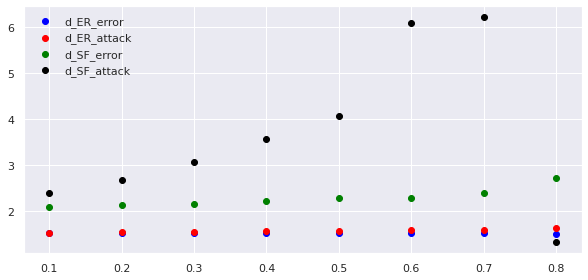

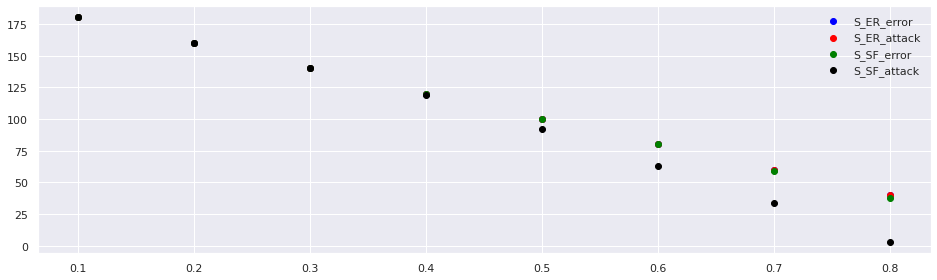

S:  180
d:  2.0817504655493484
S:  160
d:  2.107075471698113
S:  140
d:  2.157245632065776
S:  120
d:  2.2182072829131654
S:  100
d:  2.3082828282828283
S:  80
d:  2.289240506329114
S:  60
d:  2.614689265536723
S:  35
d:  2.7361344537815127
S:  180
d:  2.3623215394165116
S:  160
d:  2.629795597484277
S:  140
d:  3.0366906474820143
S:  120
d:  3.5105042016806722
S:  95
d:  4.118029115341545
S:  67
d:  5.241067390321121
S:  15
d:  3.3523809523809525
S:  6
d:  2.3333333333333335
S:  180
d:  1.8998758535071385
S:  160
d:  1.9160377358490566
S:  140
d:  1.9334018499486125
S:  120
d:  1.9703081232492998
S:  100
d:  2.0268686868686867
S:  80
d:  2.1199367088607595
S:  60
d:  2.210734463276836
S:  40
d:  2.551282051282051
S:  180
d:  1.9162631905648666
S:  160
d:  1.9502358490566039
S:  140
d:  1.9958890030832477
S:  120
d:  2.0551820728291315
S:  100
d:  2.1555555555555554
S:  80
d:  2.2734177215189875
S:  60
d:  2.461016949152542
S:  40
d:  2.6769230769230767


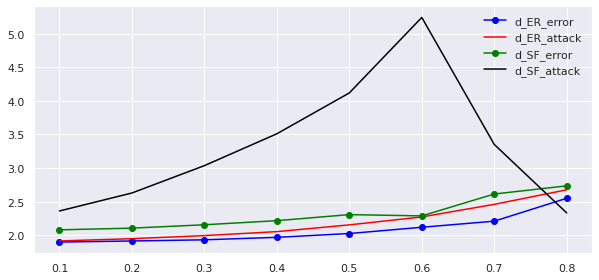

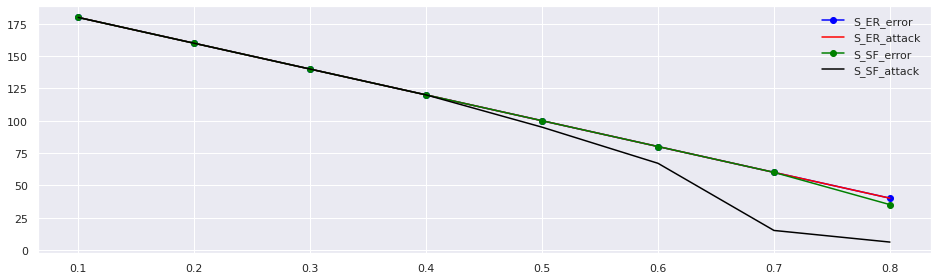

S:  180
d:  2.0781502172563626
S:  160
d:  2.101493710691824
S:  140
d:  2.150770811921891
S:  120
d:  2.234593837535014
S:  100
d:  2.3082828282828283
S:  80
d:  2.3063291139240505
S:  60
d:  2.4983050847457626
S:  35
d:  2.430252100840336
S:  180
d:  2.356983240223464
S:  160
d:  2.6442610062893084
S:  140
d:  2.9188078108941418
S:  119
d:  3.389830508474576
S:  94
d:  3.9430336307481126
S:  67
d:  4.606060606060606
S:  18
d:  4.594771241830065
S:  6
d:  2.3333333333333335
S:  180
d:  1.3837988826815641
S:  160
d:  1.3819182389937108
S:  140
d:  1.379650565262076
S:  120
d:  1.3831932773109243
S:  100
d:  1.38
S:  80
d:  1.3746835443037975
S:  60
d:  1.3632768361581922
S:  40
d:  1.3743589743589744
S:  180
d:  1.396772191185599
S:  160
d:  1.4060534591194969
S:  140
d:  1.416032887975334
S:  120
d:  1.4253501400560225
S:  100
d:  1.4321212121212121
S:  80
d:  1.4468354430379746
S:  60
d:  1.4542372881355932
S:  40
d:  1.471794871794872


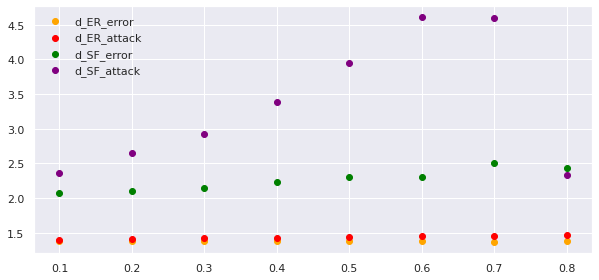

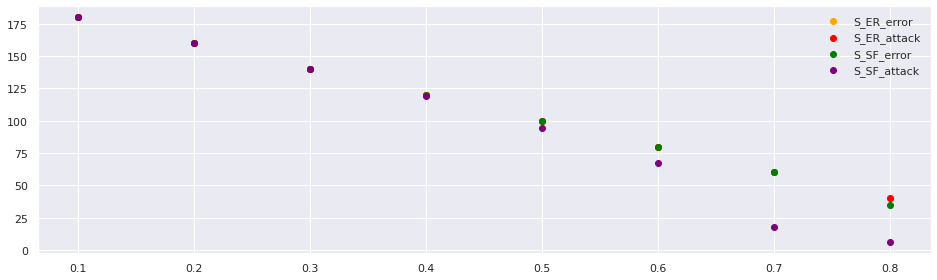

In [1417]:
#Here I repeat the same operations above for 6 more randomly selected ER and SF graphs.
#I add resulted graphs to storage arrays t_ER and t_SF since I need to calculate percolation thresholds for the last question.
#After calling randomError and targetAttack functions, I append returned d and S values as well to repeat similar plots as question requires

#this array is to plot x axis representing fraction 
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
#this for loop is to select total 6 more graphs from ER and SF cluester created at he beginning of homework
#copy_ER and copy_SF variables keeps randomly selected graphs
for i in range(3):
        
    SF_adj=nx.to_numpy_array(scale_free_array[np.random.randint(1,30)])
    copy_SF=np.array(SF_adj)

    ER_adj=nx.to_numpy_array(erdos_array[np.random.randint(1,30)])
    copy_ER=np.array(ER_adj)
    
    t_ER.append(findPercolationThreshold(copy_ER))
    t_SF.append(findPercolationThreshold(copy_SF))

    #keep d and S values for SF after random error
    SF_diameter_random=[]
    SF_S_random=[]

    for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        copy_SF_error=np.array(copy_SF)
        new_adj=randomError(copy_SF_error,f)
        time.sleep(3)
        new_adj_=nx.to_numpy_array(new_adj)
        S,d,G_sub=largestConnectedComponent(new_adj_)
        time.sleep(3)
        SF_diameter_random.append(d)
        SF_S_random.append(S)

    time.sleep(3)
    #keep d and S values for SF after target attack
    SF_diameter_target=[]
    SF_S_target=[]

    for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        copy_SF_target=np.array(copy_SF)
        new_adj=targetAttack(copy_SF_target,f)
        time.sleep(3)
        new_adj_=nx.to_numpy_array(new_adj)
        S,d,G_sub=largestConnectedComponent(new_adj_)
        time.sleep(3)
        SF_diameter_target.append(d)
        SF_S_target.append(S)

    time.sleep(3)
    #keep d and S values for ER after random error
    ER_diameter_random=[]
    ER_S_random=[]

    for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        copy_ER_error=np.array(copy_ER)
        new_adj=randomError(copy_ER_error,f)
        time.sleep(3)
        new_adj_=nx.to_numpy_array(new_adj)
        S,d,G_sub=largestConnectedComponent(new_adj_)
        time.sleep(3)
        ER_diameter_random.append(d)
        ER_S_random.append(S)

    time.sleep(3)
    #keep d and S values for ER after target attack
    ER_diameter_target=[]
    ER_S_target=[]

    for f in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        copy_ER_target=np.array(copy_ER)
        new_adj=targetAttack(copy_ER_target,f)
        time.sleep(3)
        new_adj_=nx.to_numpy_array(new_adj)
        S,d,G_sub=largestConnectedComponent(new_adj_)
        time.sleep(3)
        ER_diameter_target.append(d)
        ER_S_target.append(S)

    time.sleep(3)
#Plot 3 different figures for 3 randomly selected SF and ER graphs showing d and S. In total 6 figures 
    if i==0:
            d_ER_error = np.asarray(ER_diameter_random)
            d_ER_attack=np.asarray(ER_diameter_target)
            d_SF_error=np.asarray(SF_diameter_random)
            d_SF_attack= np.asarray(SF_diameter_target)
            S_ER_error = np.asarray(ER_S_random)
            S_ER_attack=np.asarray(ER_S_target)
            S_SF_error=np.asarray(SF_S_random)
            S_SF_attack= np.asarray(SF_S_target)

            plt.figure(2, figsize=(10, 10))

            plt.subplot(211)
            plt.scatter(x, d_ER_error, color='blue', marker='o', label='d_ER_error')
            plt.scatter(x,d_ER_attack, color='red', label='d_ER_attack')
            plt.scatter(x, d_SF_error, color='green', marker='o', label='d_SF_error')
            plt.scatter(x,d_SF_attack, color='black', label='d_SF_attack')
            plt.legend()
            plt.show()
            plt.subplot(211)
            plt.scatter(x, S_ER_error, color='blue', marker='o', label='S_ER_error')
            plt.scatter(x,S_ER_attack, color='red', label='S_ER_attack')
            plt.scatter(x, S_SF_error, color='green', marker='o', label='S_SF_error')
            plt.scatter(x,S_SF_attack, color='black', label='S_SF_attack')
            plt.legend()
            plt.show()


    if i==1:
            d_ER_error = np.asarray(ER_diameter_random)
            d_ER_attack=np.asarray(ER_diameter_target)
            d_SF_error=np.asarray(SF_diameter_random)
            d_SF_attack= np.asarray(SF_diameter_target)
            S_ER_error = np.asarray(ER_S_random)
            S_ER_attack=np.asarray(ER_S_target)
            S_SF_error=np.asarray(SF_S_random)
            S_SF_attack= np.asarray(SF_S_target)
            
            plt.figure(2, figsize=(10, 10))
            plt.subplot(211)
            plt.plot(x, d_ER_error, color='blue', marker='o', label='d_ER_error')
            plt.plot(x,d_ER_attack, color='red', label='d_ER_attack')
            plt.plot(x, d_SF_error, color='green', marker='o', label='d_SF_error')
            plt.plot(x,d_SF_attack, color='black', label='d_SF_attack')
            plt.legend()
            plt.show()
            plt.subplot(211)
            plt.plot(x, S_ER_error, color='blue', marker='o', label='S_ER_error')
            plt.plot(x,S_ER_attack, color='red', label='S_ER_attack')
            plt.plot(x, S_SF_error, color='green', marker='o', label='S_SF_error')
            plt.plot(x,S_SF_attack, color='black', label='S_SF_attack')
            plt.legend()
            plt.show()
    if i==2:
            d_ER_error = np.asarray(ER_diameter_random)
            d_ER_attack=np.asarray(ER_diameter_target)
            d_SF_error=np.asarray(SF_diameter_random)
            d_SF_attack= np.asarray(SF_diameter_target)
            S_ER_error = np.asarray(ER_S_random)
            S_ER_attack=np.asarray(ER_S_target)
            S_SF_error=np.asarray(SF_S_random)
            S_SF_attack= np.asarray(SF_S_target)
            
            plt.figure(2, figsize=(10, 10))
            plt.subplot(211)
            plt.scatter(x, d_ER_error, color='orange', marker='o', label='d_ER_error')
            plt.scatter(x,d_ER_attack, color='red', label='d_ER_attack')
            plt.scatter(x, d_SF_error, color='green', marker='o', label='d_SF_error')
            plt.scatter(x,d_SF_attack, color='purple', label='d_SF_attack')
            plt.legend()
            plt.show()
            plt.subplot(211)
            plt.scatter(x, S_ER_error, color='orange', marker='o', label='S_ER_error')
            plt.scatter(x,S_ER_attack, color='red', label='S_ER_attack')
            plt.scatter(x, S_SF_error, color='green', marker='o', label='S_SF_error')
            plt.scatter(x,S_SF_attack, color='purple', label='S_SF_attack')
            plt.legend()
            plt.show()



# QUESTION 11 Plot the percolation threshold for each of the 8 sampled graphs using your ‘findPercolationThreshold’ function. Are those thresholds concordents with what we observe in the plots you generated. Discuss and compare. Comparing ER against SF percolation thresholds for the 8 randomly selected networks, what conclusions can you derive?

/home/gamze/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


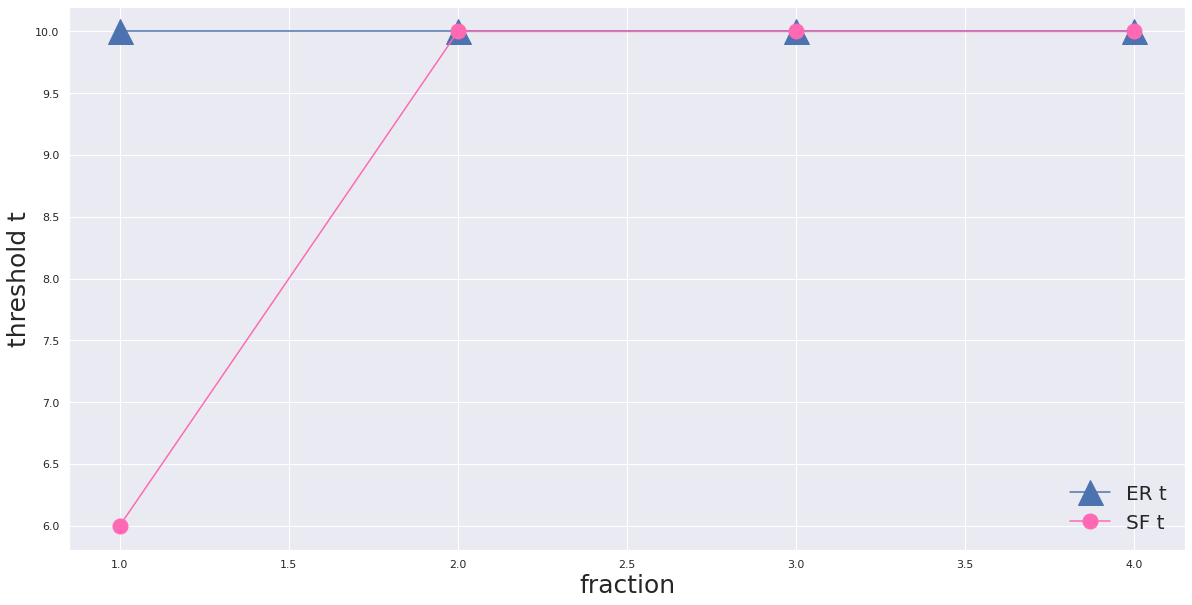

In [1419]:
#THRESHOLD t PLOTS
x = np.array([1,2,3,4])
t_ER = np.asarray(t_ER)

t_SF=np.asarray(t_SF)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x,t_ER,marker='^',color='b',linestyle = 'solid',markersize=25)
ax.plot(x,t_SF, marker='o', color='hotpink',linestyle = 'solid',markersize=15)

ax.legend(labels=['ER t', 'SF t'],fontsize=20,loc='best')
ax.set_ylabel('threshold t',fontsize=25)
ax.set_xlabel('fraction',fontsize=25)
plt.show()

ER graph thresholds stay the same for all graphs. But for SF graphs it shows increasing order. According to graphs ER and SF concordant with plots above. As S decreases and t shows increasing trends, SF increases and stays stable. As S decreases and t shows constant trends, ER stays the same.

Add your written answers here